In [2]:
import numpy as np
import pandas as pd

# 60. 単語ベクトルの読み込みと表示Permalink

In [3]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)


In [5]:
model['United_States'].shape

(300,)

In [10]:
model['US'].shape

(300,)

In [16]:
model['US'].reshape(-1).shape

(300,)

In [18]:
np.array([1, 2, 3]).shape

(3,)

# 61. 単語の類似度

In [26]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件

In [30]:
model.most_similar('United_States')

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# 63. 加法構成性によるアナロジー

In [34]:
vec = (model['Spain'] - model['Madrid'] + model['Athens'])
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [42]:
!wget http://download.tensorflow.org/data/questions-words.txt
!mv questions-words.txt ../data/

--2020-09-26 01:29:01--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org... 2404:6800:4004:81f::2010, 216.58.220.144
Connecting to download.tensorflow.org|2404:6800:4004:81f::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.3’

questions-words.txt 100%[===================>] 589.80K  1.18MB/s    in 0.5s    

2020-09-26 01:29:01 (1.18 MB/s) - ‘questions-words.txt.3’ saved [603955/603955]



In [55]:
!head -10 ../data/questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [57]:
from joblib import Parallel, delayed


question_words = []
question_words_with_score = []

with open('../data/questions-words.txt', "r") as fin:
    question_words = fin.readlines()


for index, line in enumerate(question_words):
    splitted = line.split()
    if splitted[0] == ":":
        category = splitted[1]
    else:
        factor1 = splitted[0]
        factor2 = splitted[1]
        factor3 = splitted[2]
        factor4 = splitted[3]
        most_similars = model.most_similar(positive=[factor2, factor3], negative=[factor1], topn=1)
        most_similar = most_similars[0]
        word = most_similar[0]
        score = most_similar[1]
        ans = ' '.join([category] + splitted + [word, str(score) + '\n'])
        question_words_with_score.append(ans)
        if index % 100 == 0:
            print(f"Processing index:{index}")
                
with open('../output/section7/qustion-words-add.txt', 'w') as fout:
    fout.writelines(question_words_with_score)
            
        
            
        

Processing index:100
Processing index:200
Processing index:300
Processing index:400
Processing index:500
Processing index:600
Processing index:700
Processing index:800
Processing index:900
Processing index:1000
Processing index:1100
Processing index:1200
Processing index:1300
Processing index:1400
Processing index:1500
Processing index:1600
Processing index:1700
Processing index:1800
Processing index:1900
Processing index:2000
Processing index:2100
Processing index:2200
Processing index:2300
Processing index:2400
Processing index:2500
Processing index:2600
Processing index:2700
Processing index:2800
Processing index:2900
Processing index:3000
Processing index:3100
Processing index:3200
Processing index:3300
Processing index:3400
Processing index:3500
Processing index:3600
Processing index:3700
Processing index:3800
Processing index:3900
Processing index:4000
Processing index:4100
Processing index:4200
Processing index:4300
Processing index:4400
Processing index:4500
Processing index:46

# 65. アナロジータスクでの正解率

In [64]:
with open('../output/section7/qustion-words-add.txt', 'r') as fin:
    semantic_total = 0
    semantic_correct = 0
    syntactic_total = 0
    syntactic_correct = 0
    
    for index, line in enumerate(fin):
        splitted = line.split()
        if not splitted[0].startswith('gram'):
            semantic_total += 1
            if splitted[4] == splitted[5]:
                semantic_correct += 1
        else:
            syntactic_total += 1
            if splitted[4] == splitted[5]:
                syntactic_correct += 1
                
print(f"semantic analogy accuracy: {semantic_correct/semantic_total:.2f}")
print(f"syntactic analogy accuracy: {syntactic_correct/syntactic_total:.2f}")
        

semantic analogy accuracy: 0.73
syntactic analogy accuracy: 0.74


# 66. WordSimilarity-353での評価


In [65]:
word_sim353 = []
with open('../data/wordsim353/combined.csv') as fin:
    next(fin)
    for index, line in enumerate(fin):
        line = [r.strip() for r in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        word_sim353.append(line)
        
print(word_sim353[:10])

[['love', 'sex', '6.77', 0.2639377], ['tiger', 'cat', '7.35', 0.5172962], ['tiger', 'tiger', '10.00', 1.0], ['book', 'paper', '7.46', 0.3634626], ['computer', 'keyboard', '7.62', 0.39639163], ['computer', 'internet', '7.58', 0.40686232], ['plane', 'car', '5.77', 0.3779698], ['train', 'car', '6.31', 0.3402561], ['telephone', 'communication', '7.50', 0.3321845], ['television', 'radio', '6.77', 0.6114971]]


In [67]:
from scipy.stats import spearmanr

human = np.array(word_sim353).T[2]
w2v = np.array(word_sim353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f"スピアマンの相関係数: {correlation:.3f}")

スピアマンの相関係数: 0.685


# 67. k-meansクラスタリング

In [70]:
from country_list import countries_for_language

countries_dict = dict(countries_for_language('en'))
countries_vec = []
countries = []
for shorten, country in countries_dict.items():
    try:
        countries_vec.append(model[country])
        countries.append(country)
    except KeyError:
        continue
    
    


In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Argentina, Aruba, Bolivia, Brazil, Chile, Colombia, Cuba, Ecuador, Guatemala, Haiti, Honduras, Mexico, Nicaragua, Panama, Paraguay, Peru, Suriname, Uruguay, Venezuela
cluster 1
Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Canada, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Moldova, Monaco, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Russia, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Ukraine
cluster 2
Afghanistan, Australia, Bahrain, Bangladesh, Bhutan, Brunei, Cambodia, Chad, China, Egypt, India, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Kuwait, Kyrgyzstan, Laos, Lebanon, Libya, Malaysia, Mongolia, Morocco, Nepal, Oman, Pakistan, Philippines, Qatar, Singapore, Syria, Taiwan, Tajikistan, Thailand, Turkey, Turkmenistan, Uzbekistan, Vietnam, Yemen
cluster 3
Algeria, Angola, Be

# 68. Ward法によるクラスタリング

In [72]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

<Figure size 1500x500 with 1 Axes>

# 69. t-SNEによる可視化

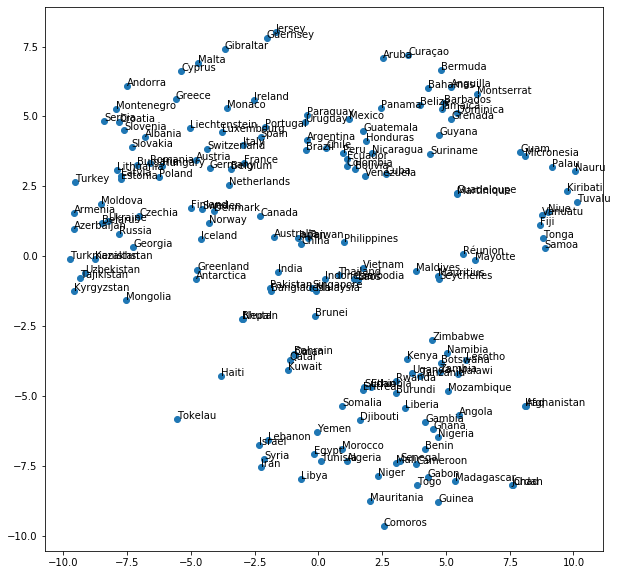

In [73]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()